# 安裝模組

In [1]:
#https://aronhack.com/zh/retrieve-stock-historical-data-with-python-and-yahoo-finance-api/
#https://blog.techbridge.cc/2020/09/21/python-pandas-zen-tutorial/
import requests
import numpy as np
import yfinance as yf
import pandas as pd
import time
import urllib.request as request
import json

# 事前準備

In [2]:
# 準備台股代碼
web='https://quality.data.gov.tw/dq_download_json.php?nid=18419&md5_url=04541d53fd5cbeb2803e0fe4becc4b97'
with request.urlopen(web) as response:
    data=json.load(response)

stock_list=[]
for item in data:
    stock_list.append(item['公司代號'])
    

len(stock_list)

966

# 爬蟲

In [3]:
# 開始爬蟲
historical_data = pd.DataFrame()
for i in stock_list:    
    
    # 抓取股票資料
    stock_id = i + '.TW'
    data = yf.Ticker(stock_id)
    df = data.history(period="max")

    # 在表格中增加股票代號
    df['STOCK_ID'] = i
    
    # 將資料格式化
    stock = pd.DataFrame(df)

    # 將df與一開始的空表格合併成一張完整表格
    historical_data = pd.concat([historical_data, stock])
    
    # 記得爬蟲禮儀
    time.sleep(0.8)


# 爬蟲資料

In [4]:
# 不分公司之台股表格

historical_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,STOCK_ID
Date,,,,,,,,
2000-01-04,7.234595,7.405829,7.234595,7.405829,1.020285e+11,0.0,0.0,1101
2000-01-05,7.255998,7.791100,7.255998,7.598464,1.574242e+08,0.0,0.0,1101
2000-01-06,7.534253,7.619870,7.213189,7.277404,7.820596e+07,0.0,0.0,1101
2000-01-07,6.977745,7.298806,6.849320,7.255999,9.198085e+07,0.0,0.0,1101
2000-01-10,7.277404,7.534252,7.170382,7.491445,8.265599e+07,0.0,0.0,1101
...,...,...,...,...,...,...,...,...
2021-07-01,135.500000,135.500000,128.500000,129.500000,7.502609e+06,0.0,0.0,9958
2021-07-02,131.000000,134.000000,129.000000,133.500000,4.521003e+06,0.0,0.0,9958
2021-07-05,135.500000,140.000000,133.500000,136.000000,9.884870e+06,0.0,0.0,9958


# 繪圖

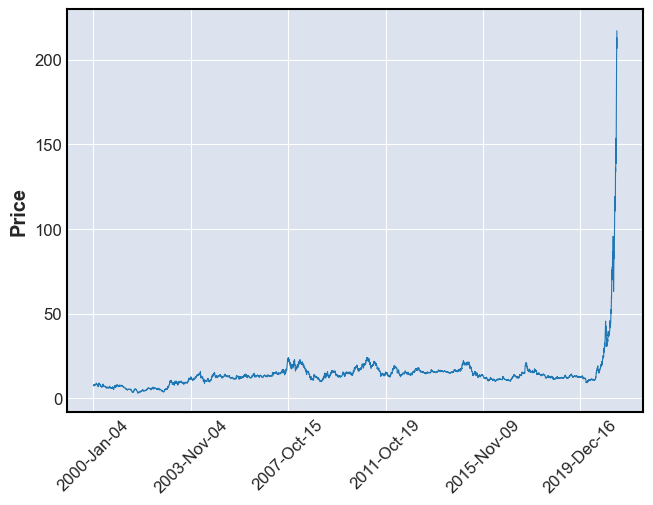

In [5]:
#挑選股票與時段
def pick(stock_number, period_start, period_end):
    global historical_data
    a = historical_data['STOCK_ID'] == stock_number
    a = historical_data[a].loc[period_start : period_end]
    return a

# 用函式定義標的
s2603=pick('2603', '2000-01-01', '2021-07-05')

#繪圖套件
import mplfinance as mpf
mpf.plot(s2603,type='line')